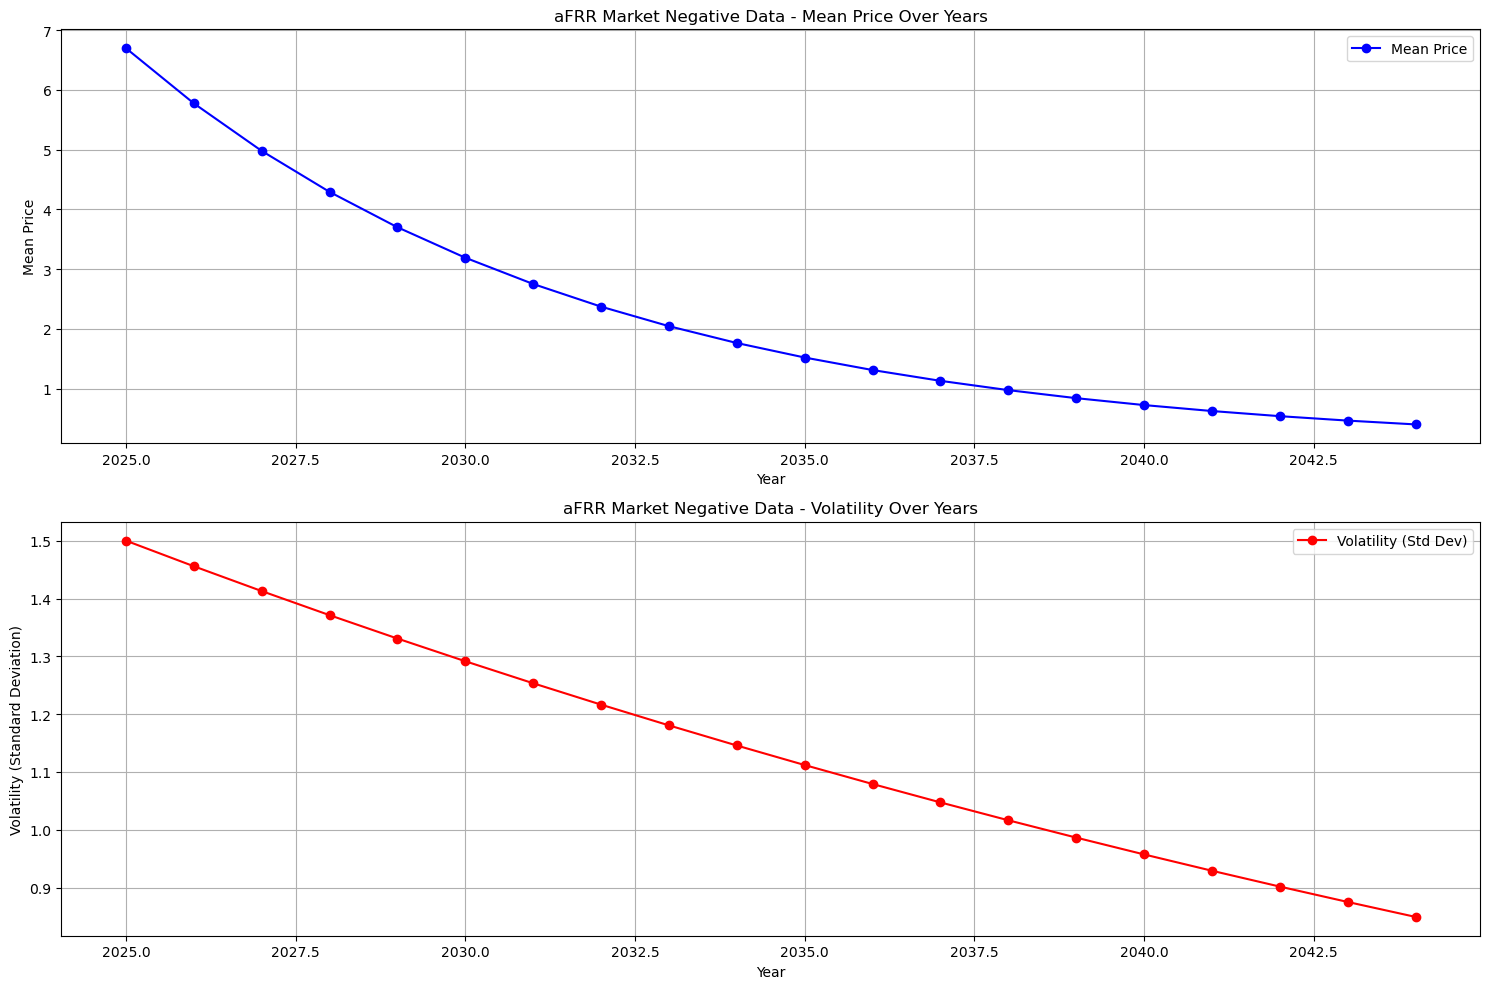

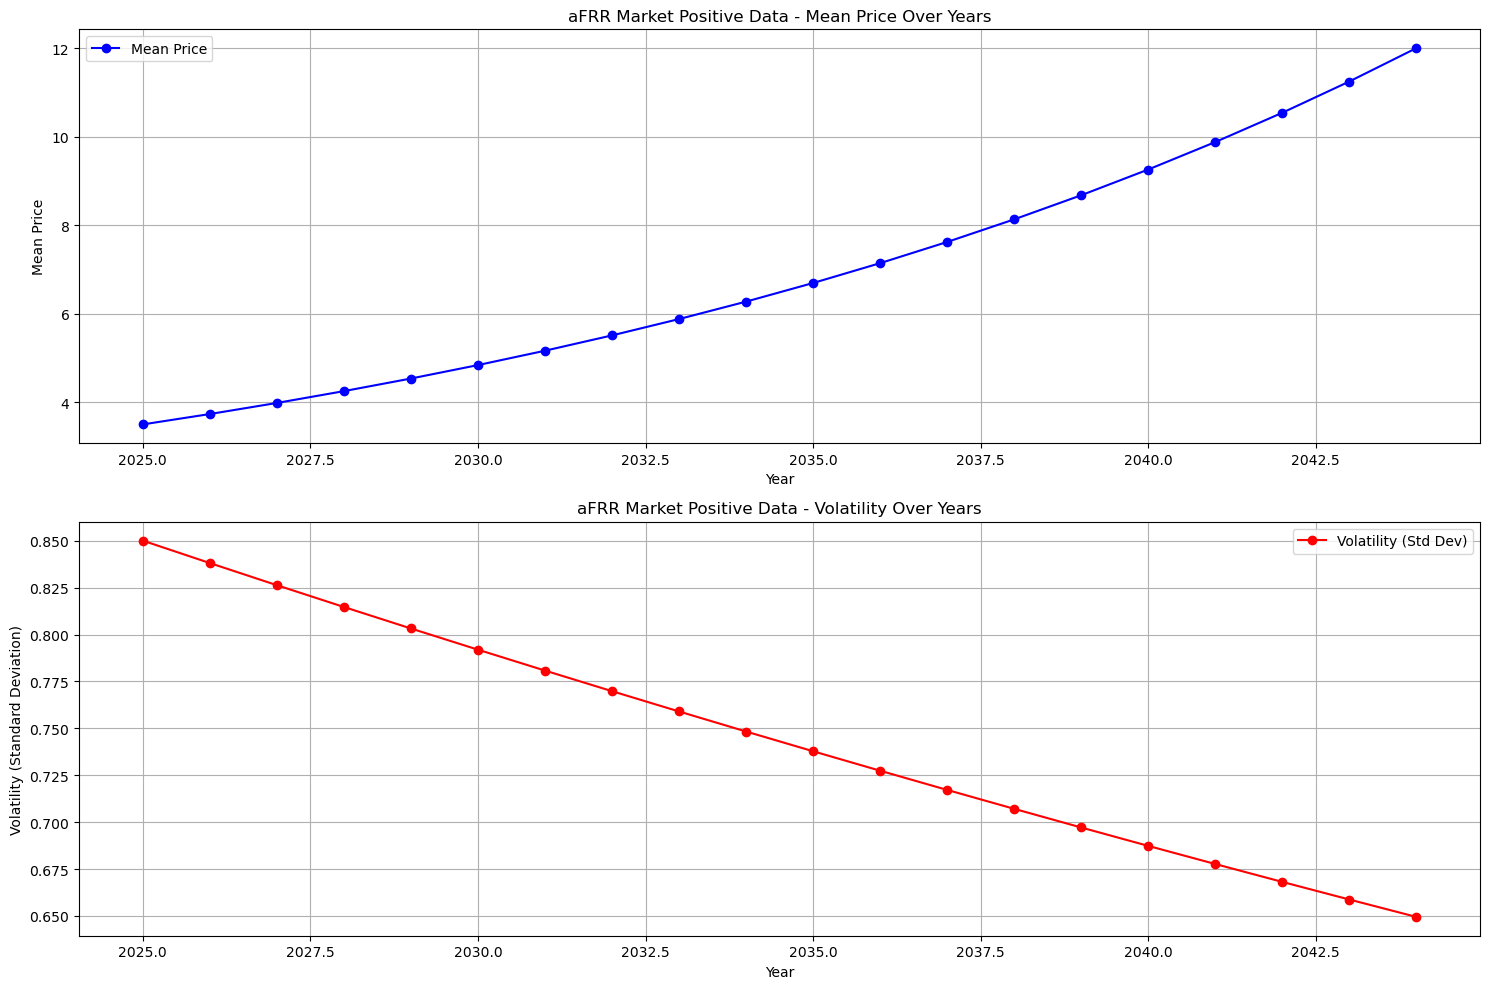

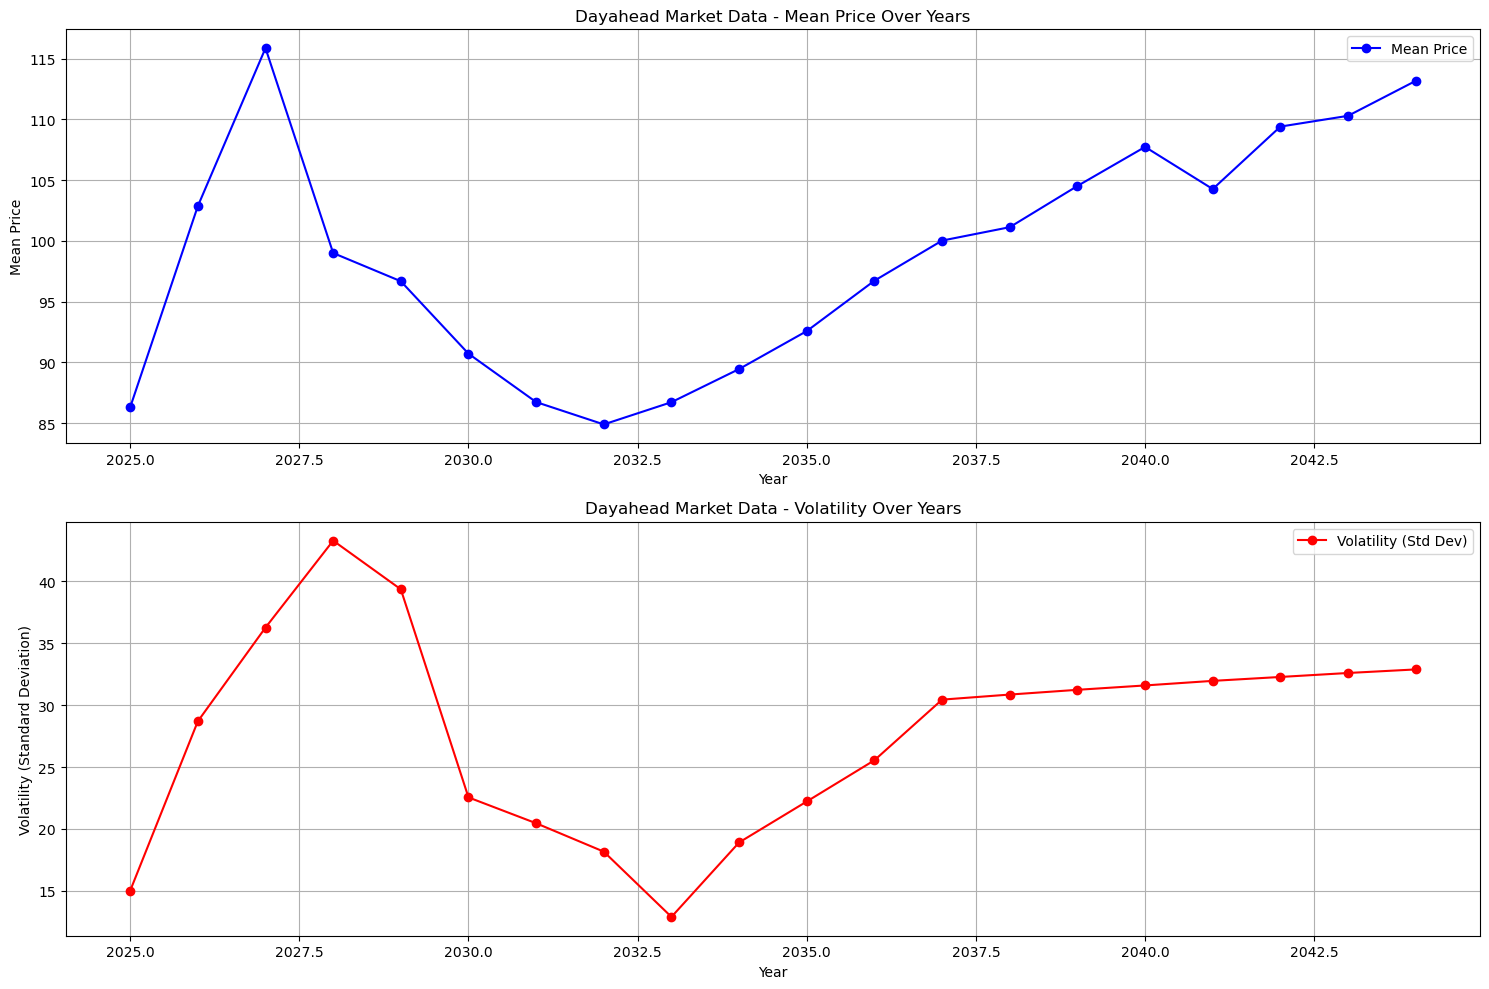

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
afrr_negative_df = pd.read_csv('aFRR_market_negative_data.csv')
afrr_positive_df = pd.read_csv('aFRR_market_positive_data.csv')
dayahead_df = pd.read_csv('Dayahead_market_data.csv')

# Reshape (melt) the data to have Year and Price columns for each dataset
def process_data(df):
    melted_df = df.melt(id_vars=["Hour"], var_name="Year", value_name="Price")
    # Extract the Year from the 'Forecast_prices:XXXX' columns
    melted_df["Year"] = melted_df["Year"].str.extract('(\d+)').astype(int)
    # Group by Year and calculate the mean and standard deviation
    stats = melted_df.groupby("Year").agg(
        Mean_Price=('Price', 'mean'),
        Std_Dev_Price=('Price', 'std')
    ).reset_index()
    return stats

# Process each dataset
afrr_negative_stats = process_data(afrr_negative_df)
afrr_positive_stats = process_data(afrr_positive_df)
dayahead_stats = process_data(dayahead_df)

# Function to plot the graphs for mean and standard deviation (volatility)
def plot_stats(stats, title):
    plt.figure(figsize=(15, 10))

    # Plot Mean Price
    plt.subplot(2, 1, 1)
    plt.plot(stats['Year'], stats['Mean_Price'], marker='o', color='b', label='Mean Price')
    plt.title(f'{title} - Mean Price Over Years')
    plt.xlabel('Year')
    plt.ylabel('Mean Price')
    plt.grid(True)
    plt.legend()

    # Plot Volatility (Standard Deviation)
    plt.subplot(2, 1, 2)
    plt.plot(stats['Year'], stats['Std_Dev_Price'], marker='o', color='r', label='Volatility (Std Dev)')
    plt.title(f'{title} - Volatility Over Years')
    plt.xlabel('Year')
    plt.ylabel('Volatility (Standard Deviation)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Generate graphs for each dataset
plot_stats(afrr_negative_stats, 'aFRR Market Negative Data')
plot_stats(afrr_positive_stats, 'aFRR Market Positive Data')
plot_stats(dayahead_stats, 'Dayahead Market Data')
